In [10]:
#import Library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#memuat dataset dalam dataframe
iris=load_iris()
df_iris=pd.DataFrame(data=iris.data, columns=iris.feature_names,index=None)
df_iris.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
#cek data null, kosong, nan
print("data null \n",df_iris.isnull().sum())
print("data kosong \n",df_iris.empty)
print("data nan \n",df_iris.isna().sum())

data null 
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
data kosong 
 False
data nan 
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [12]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='target'>

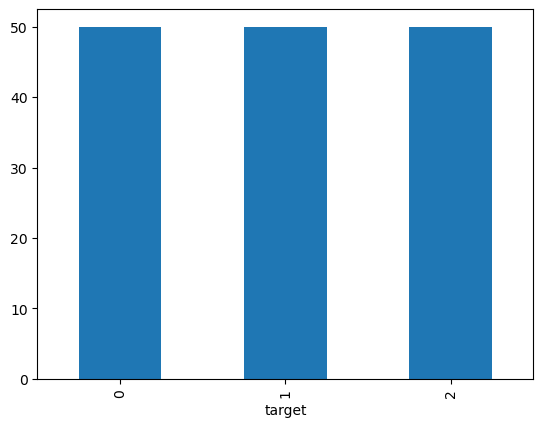

In [13]:
df_iris['target' ]=iris.target.astype(int)
freq=df_iris.target.value_counts()
freq.plot(kind='bar')

In [14]:
#import Library untuk split dataset
from sklearn.model_selection import train_test_split

X= df_iris.drop('target', axis=1)
y = df_iris. target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)

print("bentuk X_train",X_train.shape)
print("bentuk X_test",X_test.shape)

print("bentuk y_train",y_train.shape)
print("bentuk y_test", y_test.shape)

print("y_train \n",y_train)
print("y_test \n",y_train)

bentuk X_train (112, 4)
bentuk X_test (38, 4)
bentuk y_train (112,)
bentuk y_test (38,)
y_train 
 61     1
92     1
112    2
2      0
141    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 112, dtype: int32
y_test 
 61     1
92     1
112    2
2      0
141    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 112, dtype: int32


In [18]:
#import Library untuk model machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier

#buat obyek model machine Learning
KNN = KNeighborsClassifier(n_neighbors=2, p=2)
DT = DecisionTreeClassifier(random_state=0, max_depth=3)

#Latih model machine Learning
KNN. fit(X_train,y_train)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
#buat array untuk X baru yang akan diprediksi
X_new=np.array([[4.0,2.1,2.4,1.7]])

print("X_new yang akan diprediksi",X_new.shape)

#prediksi Label dari X baru
knn_predict=KNN.predict(X_new)
print("Label prediksi KNN", knn_predict)

dt_predict=DT.predict(X_new)
print("Label prediksi DT",dt_predict)

X_new yang akan diprediksi (1, 4)
Label prediksi KNN [1]
Label prediksi DT [2]


d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

d:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [20]:
y_pred_knn=KNN.predict(X_test)

y_pred_dt=DT.predict(X_test)

print("Hasil prediksi KNN pada X_test:",y_pred_knn)
print("Hasil prediksi DT pada X_test:",y_pred_dt)

Hasil prediksi KNN pada X_test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Hasil prediksi DT pada X_test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [21]:
print("Akurasi model KNN dengan fungsi score", round(KNN.score(X_test,y_test),3))
print("Akurasi model DT perbandingan prediksi vs label", round(DT. score(X_test, y_test), 3))

Akurasi model KNN dengan fungsi score 0.974
Akurasi model DT perbandingan prediksi vs label 0.974


In [22]:
import pickle

with open('knn_dt_iris_model.pkl','wb') as f:
    pickle.dump((KNN,DT), f)

print("Model KNN dan DT berhasil disimpan")

Model KNN dan DT berhasil disimpan
